In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
conn =sqlite3.connect('inventory.db')
df =pd.read_sql_query("SELECT * FROM  query",conn)

In [3]:
df.head(5)

,VendorNumber,VendorName,Brand,PurchasePrice,volume,Description,ActualPrice,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRation
0,1128,BROWN-FORMAN CORP,1233,26.27,1750.0,Jack Daniels No 7 Black,36.99,145080,3811251.60,5101919.51,142049.0,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,1750.0,Tito's Handmade Vodka,28.99,164038,3804041.22,4819073.49,160247.0,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,1750.0,Absolut 80 Proof,24.99,187407,3418303.68,4538120.60,187140.0,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750.0,Capt Morgan Spiced Rum,22.99,201682,3261197.94,4475972.88,200412.0,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750.0,Ketel One Vodka,29.99,138109,3023206.01,4223107.62,135838.0,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df.describe()

,VendorNumber,Brand,PurchasePrice,volume,ActualPrice,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRation
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,847.360550,35.643671,3140.886831,3.010669e+04,4.223907e+04,3077.482136,18793.783627,1774.226259,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,664.309212,148.246016,11095.086769,1.230678e+05,1.676553e+05,10952.851391,44952.773386,10975.582240,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,50.000000,0.490000,1.000000,7.100000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,750.000000,10.990000,36.000000,4.534575e+02,7.292200e+02,33.000000,289.710000,4.800000,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,750.000000,15.990000,262.000000,3.655465e+03,5.298045e+03,261.000000,2857.800000,46.570000,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,750.000000,28.990000,1975.750000,2.073825e+04,2.839692e+04,1929.250000,16059.562500,418.650000,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,20000.000000,7499.990000,337660.000000,3.811252e+06,5.101920e+06,334939.000000,672819.310000,368242.800000,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


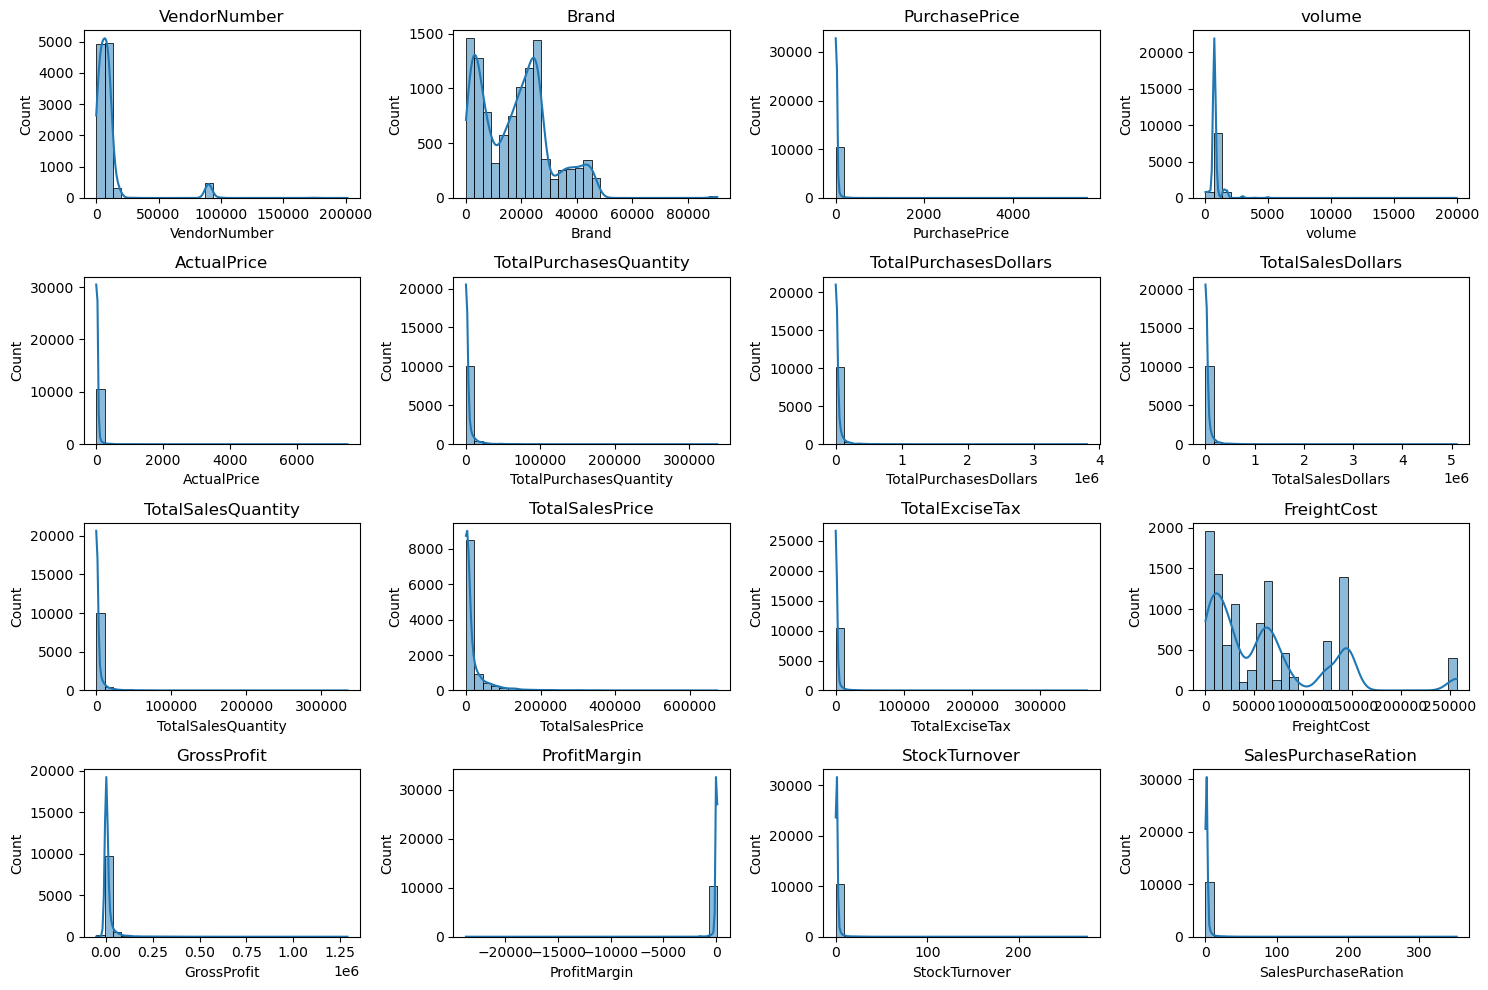

In [5]:
numerical_cols = df.select_dtypes(include =np.number).columns

plt.figure(figsize=(15,10))
for i,col in  enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins =30)
    plt.title(col)
plt.tight_layout()
plt.show()

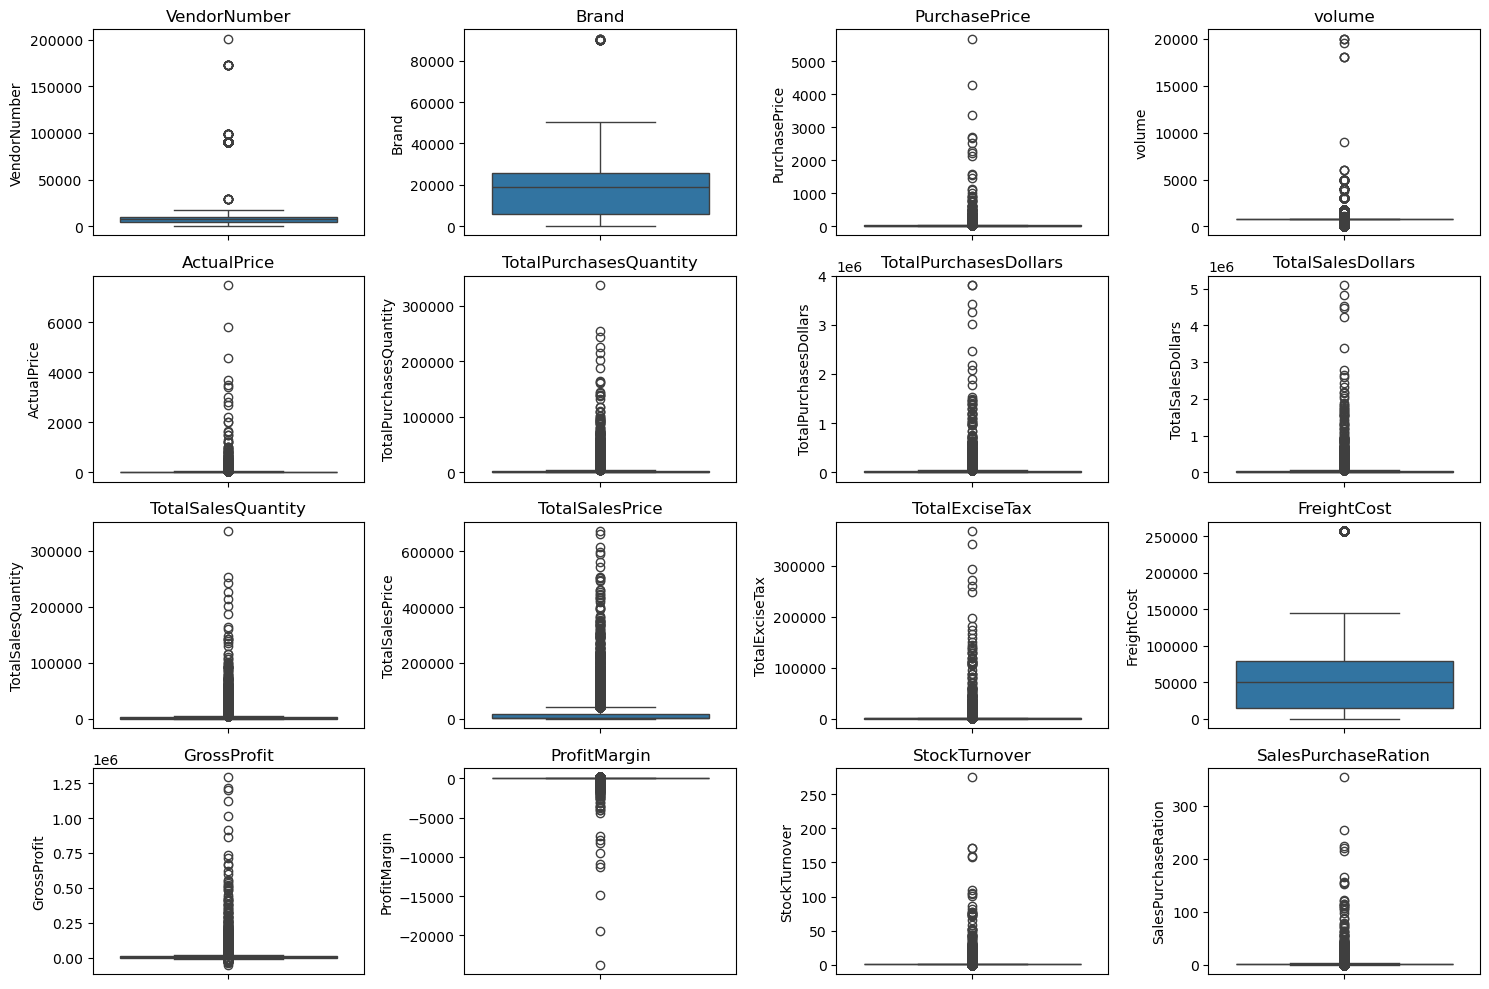

In [6]:
numerical_cols = df.select_dtypes(include =np.number).columns

plt.figure(figsize=(15,10))
for i,col in  enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
df =pd.read_sql_query("""select *from query
where GrossProfit >0
and   ProfitMargin>0
and TotalSalesQuantity>0""",conn)

In [8]:
df

,VendorNumber,VendorName,Brand,PurchasePrice,volume,Description,ActualPrice,TotalPurchasesQuantity,TotalPurchasesDollars,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRation
0,1128,BROWN-FORMAN CORP,1233,26.27,1750.0,Jack Daniels No 7 Black,36.99,145080,3811251.60,5101919.51,142049.0,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,1750.0,Tito's Handmade Vodka,28.99,164038,3804041.22,4819073.49,160247.0,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,1750.0,Absolut 80 Proof,24.99,187407,3418303.68,4538120.60,187140.0,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750.0,Capt Morgan Spiced Rum,22.99,201682,3261197.94,4475972.88,200412.0,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750.0,Ketel One Vodka,29.99,138109,3023206.01,4223107.62,135838.0,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,1.32,750.0,Concannon Glen Ellen Wh Zin,4.99,2,2.64,15.95,5.0,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,0.39,50.0,Dr McGillicuddy's Apple Pie,0.49,6,2.34,65.66,134.0,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50.0,Deep Eddy Vodka,0.99,2,1.48,1.98,2.0,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200.0,The Club Strawbry Margarita,1.99,1,1.47,143.28,72.0,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


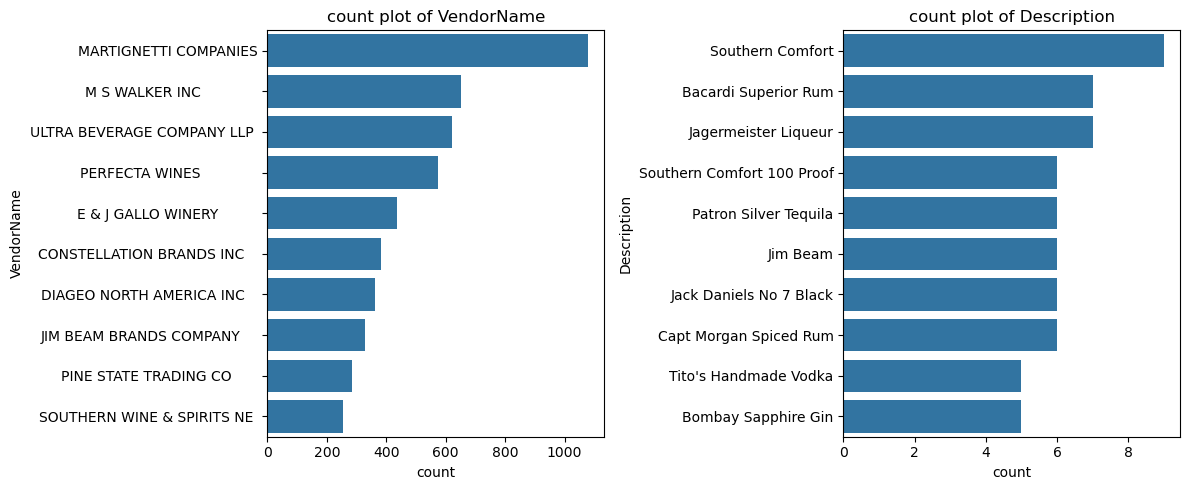

In [11]:
categorical_cols =["VendorName","Description"]

plt.figure(figsize=(12,5))
for i,col in  enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

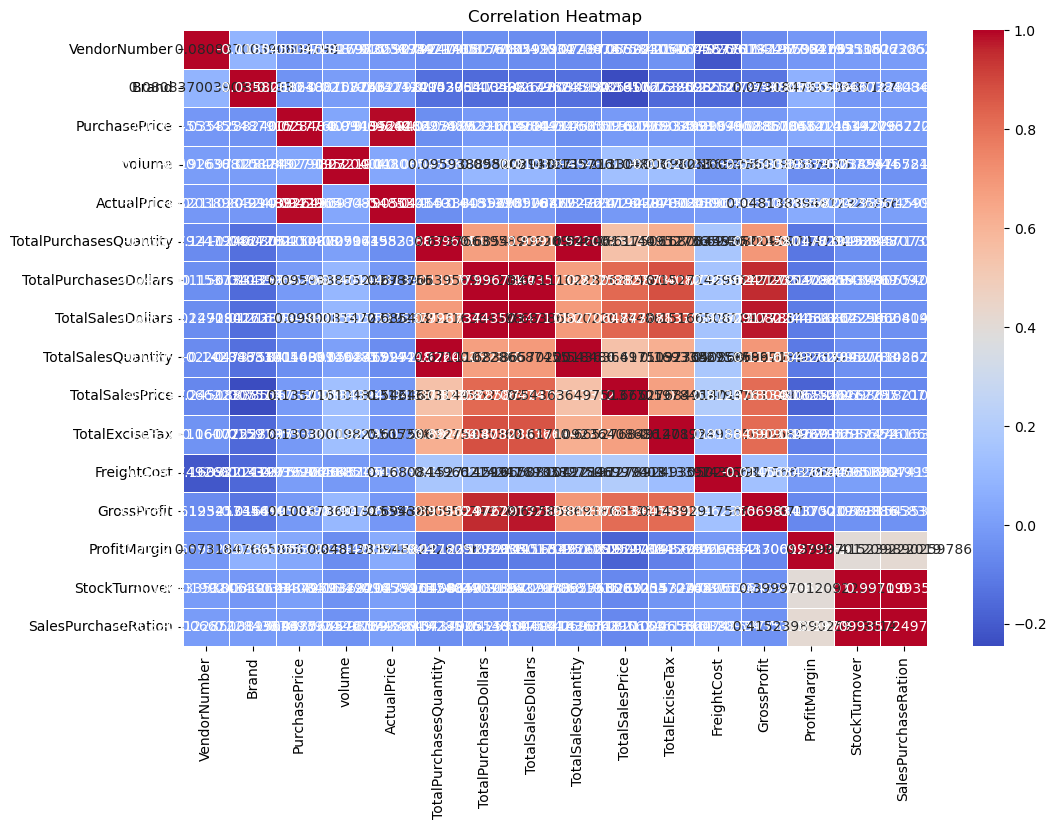

In [9]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot =True,fmt="21",cmap="coolwarm",linewidths =0.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
    

In [11]:
low_sales_thersold =brand_performance['TotalSalesDollars'].quantile(0.15)
high_sales_thersold =brand_performance['ProfitMargin'].quantile(0.85)

In [12]:
low_sales_thersold

560.299

In [13]:
high_sales_thersold

64.97017552750113

In [14]:
target_brand = brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_thersold) &
(brand_performance['ProfitMargin'] >=high_sales_thersold)]
display(target_brand.sort_values('TotalSalesDollars'))

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance =brand_performance[brand_performance['TotalSalesDollars']<10000]

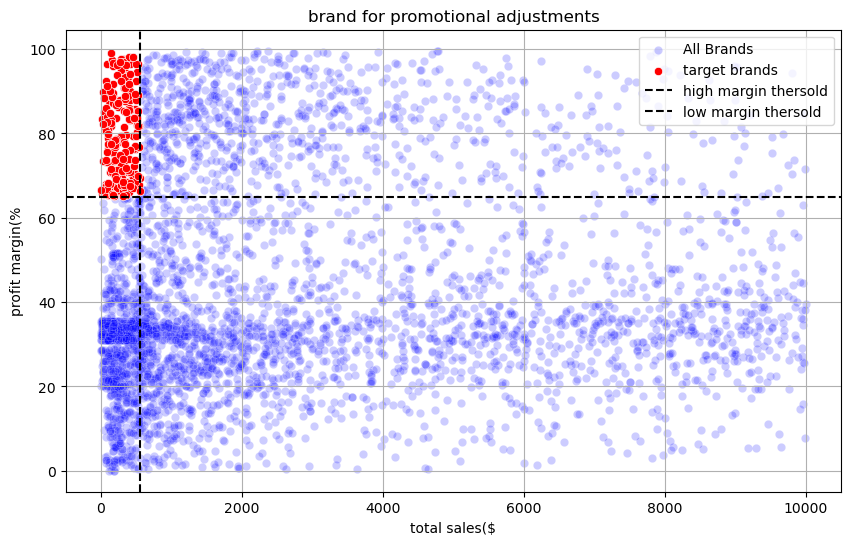

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars', y='ProfitMargin',color ="blue",label ="All Brands",alpha =0.2)
sns.scatterplot(data= target_brand,x='TotalSalesDollars', y='ProfitMargin',color ="red",label ="target brands")

plt.axhline(high_sales_thersold,linestyle ='--',color="black",label ="high margin thersold")
plt.axvline(low_sales_thersold,linestyle ='--',color="black",label ="low margin thersold")
plt.xlabel("total sales($")
plt.ylabel("profit margin(%")
plt.title("brand for promotional adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)
        

In [18]:
topvendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
topbrands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
topvendors


VendorName
DIAGEO NORTH AMERICA INC       67990099.42
MARTIGNETTI COMPANIES          39276398.80
PERNOD RICARD USA              32063196.19
JIM BEAM BRANDS COMPANY        31423020.46
BACARDI USA INC                24854817.14
CONSTELLATION BRANDS INC       24218745.65
E & J GALLO WINERY             18399899.46
BROWN-FORMAN CORP              18247230.65
ULTRA BEVERAGE COMPANY LLP     16502544.31
M S WALKER INC                 14706458.51
Name: TotalSalesDollars, dtype: float64

In [19]:
topbrands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [20]:
topvendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

In [21]:
topbrands.apply(lambda x:format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

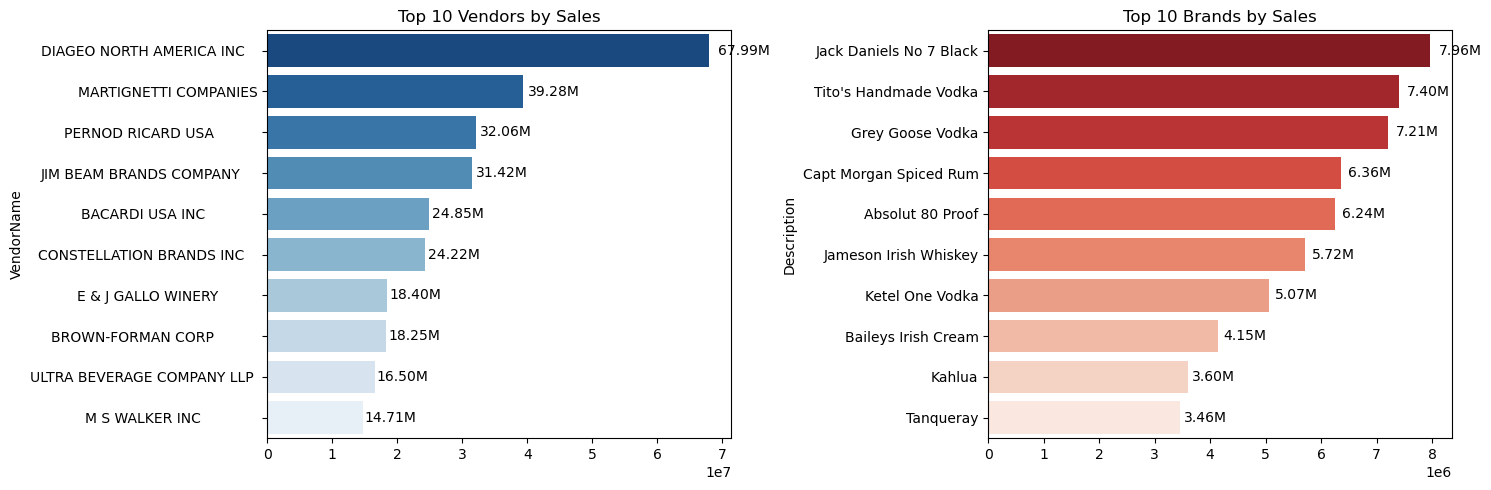

In [22]:
plt.figure(figsize=(15, 5))

# --- First subplot: Top 10 vendors ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=topvendors.index, x=topvendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + bar.get_width() * 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# --- Second subplot: Top 10 brands ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=topbrands.index.astype(str), x=topbrands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + bar.get_width() * 0.02,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()



In [23]:
vendor_performance=df.groupby('VendorName').agg({
'TotalPurchasesDollars':'sum',
'GrossProfit':'sum',
'TotalSalesDollars':'sum'
}).reset_index()
vendor_performance

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [24]:
vendor_performance['purchase_contribution%'] =vendor_performance['TotalPurchasesDollars']/vendor_performance['TotalPurchasesDollars'].sum()*100

In [25]:
vendor_performances =round(vendor_performance.sort_values('purchase_contribution%',ascending =False),2)

In [43]:
vendor_performance

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,purchase_contribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [45]:
import os
import pandas as pd

# Example DataFrame saved to SQLite earlier
vendor_performance.to_sql('vendor_performance', conn, if_exists='replace', index=False)

# Read back the table from SQLite
df = pd.read_sql('SELECT * FROM vendor_performance', conn)

# Define your folder path (change this to your desired location)
folder_path = r'C:\Users\abhil\Vendor performance analysis'  # Windows
# folder_path = '/Users/YourName/Documents/EDA_Results'  # macOS/Linux

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Define full file path
file_path = os.path.join(folder_path, 'vendor_performance.csv')

# Save as CSV
df.to_csv(file_path, index=False)

print(f"✅ Final table saved at: {file_path}")

✅ Final table saved at: C:\Users\abhil\Vendor performance analysis\vendor_performance.csv


In [38]:
topvendors = vendor_performances.head().copy()

topvendors['TotalSalesDollars'] = topvendors['TotalSalesDollars'].apply(format_dollars)
topvendors['TotalPurchasesDollars'] = topvendors['TotalPurchasesDollars'].apply(format_dollars)
topvendors['GrossProfit'] = topvendors['GrossProfit'].apply(format_dollars)

topvendors


,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,purchase_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67


In [32]:
import os
import pandas as pd

# Example DataFrame saved to SQLite earlier
topvendors.to_sql('topvendors', conn, if_exists='replace', index=False)

# Read back the table from SQLite
df = pd.read_sql('SELECT * FROM topvendors', conn)

# Define your folder path (change this to your desired location)
folder_path = r'C:\Users\abhil\Vendor performance analysis'  # Windows
# folder_path = '/Users/YourName/Documents/EDA_Results'  # macOS/Linux

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Define full file path
file_path = os.path.join(folder_path, 'topvendors.csv')

# Save as CSV
df.to_csv(file_path, index=False)

print(f"✅ Final table saved at: {file_path}")

✅ Final table saved at: C:\Users\abhil\Vendor performance analysis\topvendors.csv


In [28]:
topvendors['comulative_contribution%'] =topvendors['purchase_contribution%'].cumsum()
topvendors

,VendorName,TotalPurchasesDollars,GrossProfit,TotalSalesDollars,purchase_contribution%,comulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,24.59
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.35
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,39.99
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.66
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.63
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.94
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.87
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.50
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.68


In [39]:
topvendors.columns

Index(['VendorName', 'TotalPurchasesDollars', 'GrossProfit',
       'TotalSalesDollars', 'purchase_contribution%'],
      dtype='object')

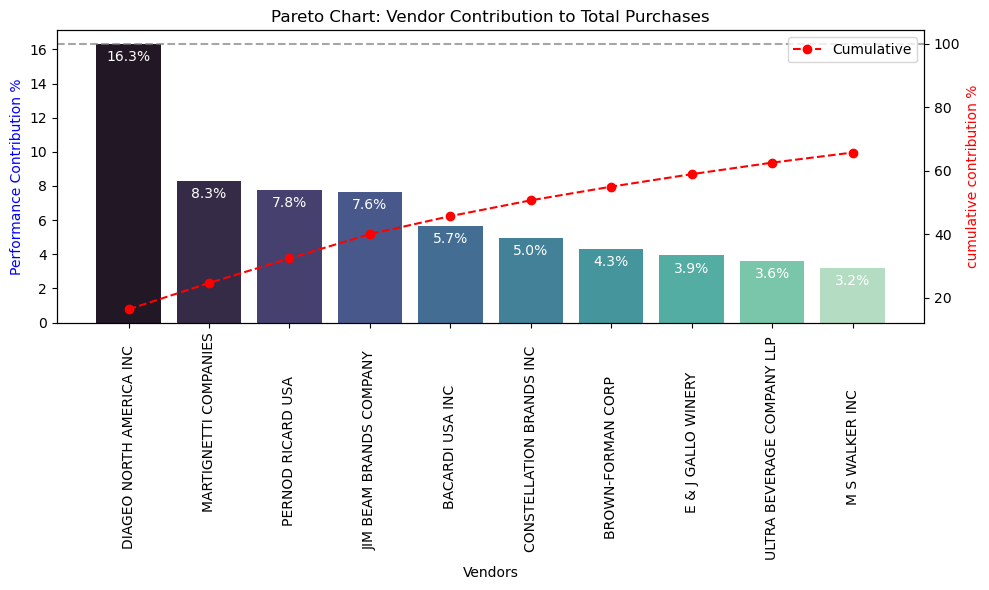

In [34]:


fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for performance contribution %
sns.barplot(
    x=topvendors['VendorName'],
    y=topvendors['performance_contribution%'],
    palette="mako",
    ax=ax1
)

# Annotate bars with % values
for i, value in enumerate(topvendors['performance_contribution%']):
    ax1.text(
        i,
        value - 1,
        f"{value:.1f}%",
        ha='center',
        fontsize=10,
        color='white'
    )

# Line Plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(
    topvendors['VendorName'],
    topvendors['comulative_contribution%'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative'
)

# Axis labels and title
ax1.set_xticklabels(topvendors['VendorName'], rotation=90)
ax1.set_ylabel('Performance Contribution %', color='blue')
ax2.set_ylabel('cumulative contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Horizontal reference line and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()



In [35]:
print(f"Total purchase Contribution of top vendors is {round(topvendors['performance_contribution%'].sum(),2)} %")

Total purchase Contribution of top vendors is 65.68 %


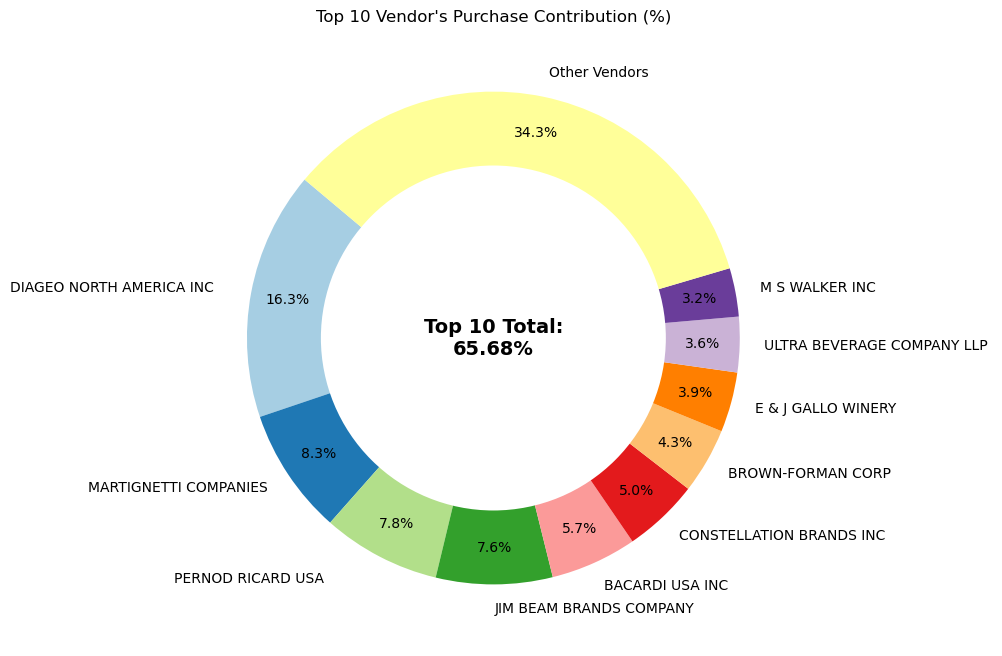

In [36]:
# Prepare data
vendors = list(topvendors['VendorName'].values)
purchase_contributions = list(topvendors['performance_contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14,
         fontweight='bold', ha='center', va='center')

# Title
plt.title("Top 10 Vendor's Purchase Contribution (%)")

# Show plot
plt.show()


In [37]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'PurchasePrice', 'volume',
       'Description', 'ActualPrice', 'TotalPurchasesQuantity',
       'TotalPurchasesDollars', 'TotalSalesDollars', 'TotalSalesQuantity',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesPurchaseRation'],
      dtype='object')

In [38]:
df['UnitpurchasePrice'] =df['TotalPurchasesDollars']/df['TotalPurchasesQuantity']

In [39]:
df["OrderSize"] =pd.qcut(df["TotalPurchasesQuantity"],q=3,labels =["small","medium","large"])

In [40]:
df.groupby('OrderSize')[['UnitpurchasePrice']].mean()

,UnitpurchasePrice
OrderSize,
small,39.068186
medium,15.486414
large,10.777625


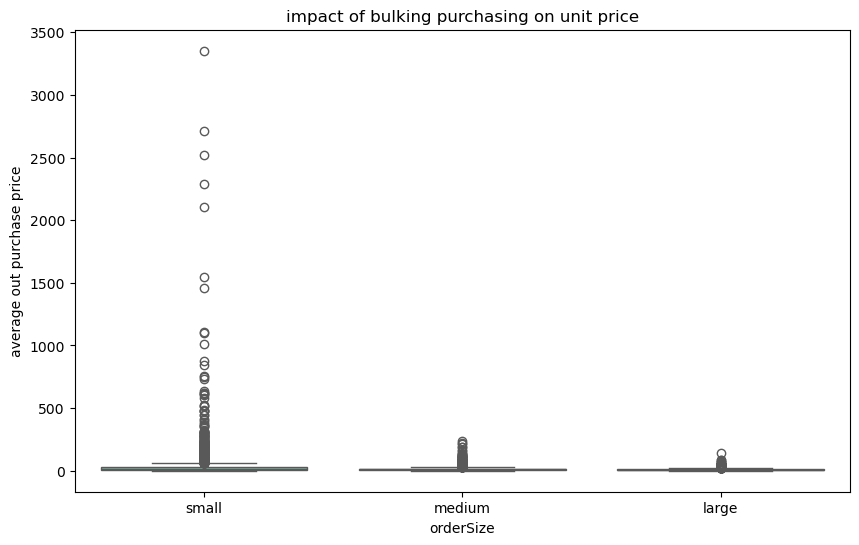

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data =df,x="OrderSize",y="UnitpurchasePrice",palette ="Set2")
plt.title("impact of bulking purchasing on unit price")
plt.xlabel("orderSize")
plt.ylabel("average out purchase price")
plt.show()

In [49]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending =True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [53]:
df["UnSoldInventory"] = df["TotalPurchasesQuantity"] - df["TotalSalesQuantity"]
df["UnSoldInventoryValue"] = df["UnSoldInventory"] * df["PurchasePrice"]
print('Unsold capital value :', format_dollars(df["UnSoldInventoryValue"].sum()))


Unsold capital value : 2.71M


In [56]:
inventory_value_per_vendor =df.groupby("VendorName")["UnSoldInventoryValue"].sum().reset_index()
inventory_value_per_vendor=inventory_value_per_vendor.sort_values( by='UnSoldInventoryValue',ascending =False)
inventory_value_per_vendor['UnSoldInventoryValue'] =inventory_value_per_vendor['UnSoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnSoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
69,PERNOD RICARD USA,470.63K
117,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
80,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
62,MOET HENNESSY USA INC,126.48K
78,REMY COINTREAU USA INC,118.60K


In [72]:
top_thresold = df["TotalSalesDollars"].quantile(0.75)
low_thresold = df["TotalSalesDollars"].quantile(0.25)


In [73]:
top_vendors = df[df["TotalSalesDollars"] >= top_thresold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_thresold]["ProfitMargin"].dropna()


In [75]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [76]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    lower_bound = mean_val - margin_of_error
    upper_bound = mean_val + margin_of_error
    return mean_val, lower_bound, upper_bound

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


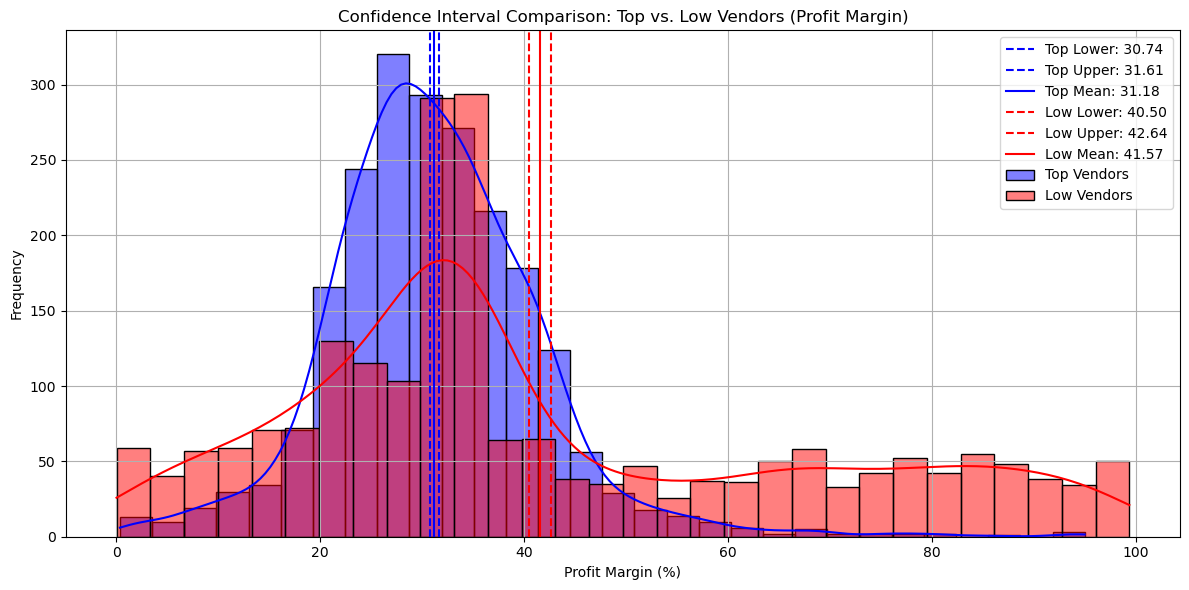

In [77]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

# Extract profit margins
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform Two-Sample T-Test (Welch's T-test)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
